






<h2 id='part1'>Business Understanding</h2>

Using the Seattle Airbnb (https://www.kaggle.com/datasets/airbnb/seattle/data) dataset from Kaggle, we would like to deep dive and discuss these three business-oriented questions:

1. What are the seasonal trends in pricing across Seattle?
2. What factors impact a listing's average rating or occupancy?
3. Are there certain neighborhoods or property types with the highest bookings?

<h2 id='part2'>About the Dataset</h2>

<h3 id='Context'>Context</h3>

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

<h3 id='Content'>Content</h3>
The following Airbnb activity is included in this Seattle dataset:

Listings, including full descriptions and average review score

Reviews, including unique id for each reviewer and detailed comments

Calendar, including listing id and the price and availability for that day



In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3 id='part1'>Data Gathering</h3>

In [ ]:
# Load datasets
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')
calendar = pd.read_csv('calendar.csv')

# View the first few rows of each dataset
display(listings.head())
display(reviews.head())
display(calendar.head())


In [ ]:
print(f'Listings shape: {listings.shape}')
print(f'Reviews shape: {reviews.shape}')
print(f'Calendar shape: {calendar.shape}')

# Check for data types and null values
listings.info()
reviews.info()
calendar.info()

<h3 id='part1'>Prepare Data</h3>

In [13]:
# Remove dollar sign and convert `price` to numeric
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

# Remove non-numeric characters from the 'price' column and convert to float
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

# Check for missing values in `calendar`
calendar.isna().sum()


listing_id         0
date               0
available          0
price         459028
month              0
dtype: int64

In [5]:
# Count the number of reviews per listing
review_counts = reviews.groupby('listing_id').size().reset_index(name='review_count')
listings = listings.merge(review_counts, left_on='id', right_on='listing_id', how='left')
listings['review_count'] = listings['review_count'].fillna(0)

In [8]:
# Fill or drop missing values as needed
listings['review_scores_value'].fillna(listings['review_scores_value'].median(), inplace=True)
listings['neighborhood_overview'].fillna('No overview', inplace=True)

Q1: What are the seasonal trends in pricing across Seattle?

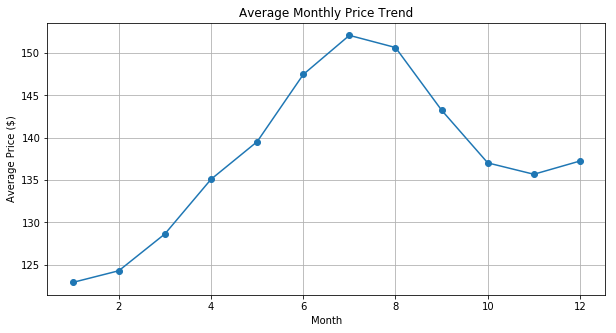

In [7]:
# Convert `date` in `calendar.csv` to datetime
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['month'] = calendar['date'].dt.month

# Average price per month
monthly_price_trend = calendar.groupby('month')['price'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
monthly_price_trend.plot(kind='line', marker='o')
plt.title('Average Monthly Price Trend')
plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()

Q2: What factors impact a listing's average rating or occupancy?

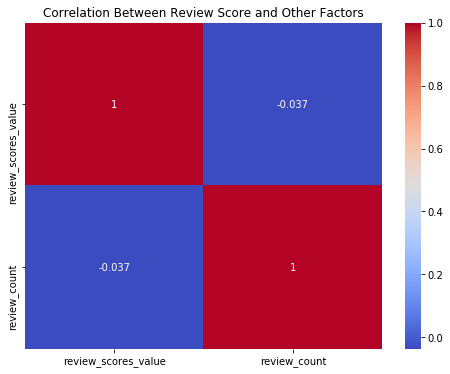

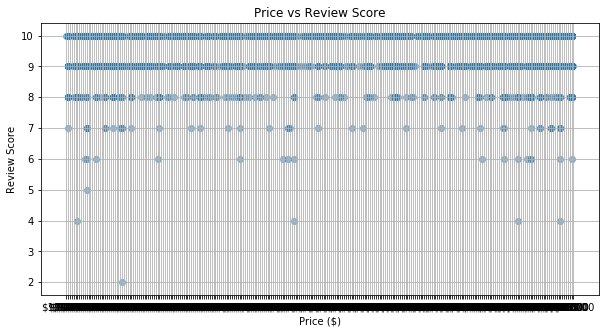

In [11]:
# Correlation analysis for numerical fields
plt.figure(figsize=(8, 6))
sns.heatmap(listings[['review_scores_value', 'price', 'review_count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Review Score and Other Factors')
plt.show()

# Scatter plot for price vs. review scores using matplotlib
plt.figure(figsize=(10, 5))
plt.scatter(listings['price'], listings['review_scores_value'], alpha=0.5)
plt.title('Price vs Review Score')
plt.xlabel('Price ($)')
plt.ylabel('Review Score')
plt.grid(True)
plt.show()

Q3: Are there certain neighborhoods or property types with the highest bookings?

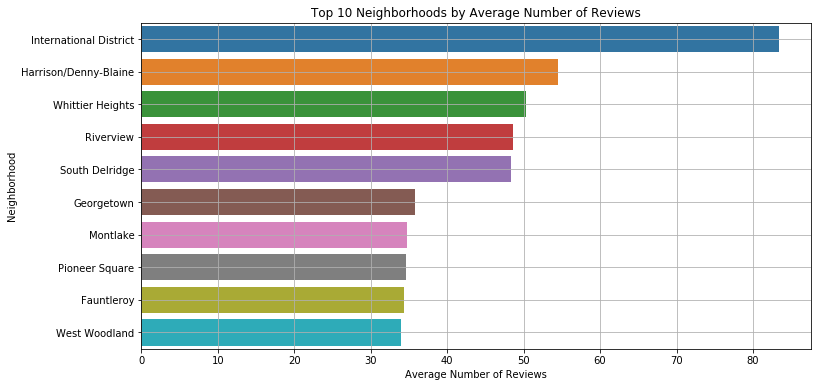

In [14]:
# Group by neighborhood and calculate average price and review count
neighborhood_stats = listings.groupby('neighbourhood_cleansed').agg({
    'price': 'mean',
    'review_count': 'mean'
}).reset_index()

# Plot the top 10 neighborhoods by average number of reviews
plt.figure(figsize=(12, 6))
sns.barplot(data=neighborhood_stats.sort_values(by='review_count', ascending=False).head(10),
            x='review_count', y='neighbourhood_cleansed')
plt.title('Top 10 Neighborhoods by Average Number of Reviews')
plt.xlabel('Average Number of Reviews')
plt.ylabel('Neighborhood')
plt.grid(True)
plt.show()

## Key Insights and Conclusions
1. **Seasonal Price Trends**: Prices in Seattle tend to peak in the summer months, suggesting high demand in warmer weather.
2. **Factors Affecting Ratings**: Guests may value factors unrelated to price when leaving high ratings, which could indicate the importance of non-monetary aspects such as cleanliness, location, or service quality in determining review scores.
3. **Popular Neighborhoods**: The analysis indicates that certain neighborhoods, particularly International District and Harrison/Denny-Blaine, likely experience higher bookings due to their popularity as reflected in review counts. 

Find more details at: https://github.com/HiiImTrung/DS-Write-a-Blog-Post/blob/main/Seattle%20Blog%20Post%20Analysis.md
